Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import glob
import pickle 
import cv2
from skimage import io
from skimage.transform import resize
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from pathlib import Path
import seaborn as sb
from tensorflow.keras import layers

In [42]:
a=np.array([])


In [88]:
datadir=Path("drive/MyDrive/flowers")
flowers = []
features =[]
labels = []
for dir in datadir.iterdir():
    flowers.append(dir.name)
    print(dir.name)
    for img_path in dir.iterdir():
        if img_path.name.endswith("jpg"):
            labels.append(dir.name)
            img_arr = cv2.imread(str(img_path), cv2.IMREAD_COLOR)
            img_arr = cv2.resize(img_arr, (50,50))
            features.append(img_arr)

flowers
sunflower
daisy
rose
dandelion
tulip


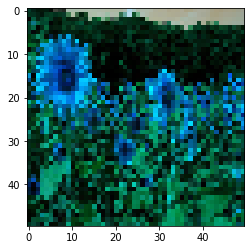

In [89]:
plt.imshow(features[100])
plt.show()

In [90]:
features = np.array(features)
labels = np.array(labels)
np.savez_compressed("flower_data", features, labels)

In [109]:
def prep(features, labels):
    features=features.reshape(len(features), 50,50,3)/255.0
    one_hot=LabelBinarizer()
    labels=one_hot.fit_transform(labels)
    return features, labels, one_hot

In [110]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (50,50,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [111]:
x,y,one_hot=prep(features, labels)
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.4, random_state=42, shuffle=True)

In [112]:
training_model = model.fit(x_train, y_train, epochs=50, batch_size=128)

Epoch 1/50
21/21 [==============================] - 15s 692ms/step - loss: 1.5314 - accuracy: 0.3005
Epoch 2/50
21/21 [==============================] - 14s 684ms/step - loss: 1.2185 - accuracy: 0.4751
Epoch 3/50
21/21 [==============================] - 14s 685ms/step - loss: 1.1700 - accuracy: 0.5170
Epoch 4/50
21/21 [==============================] - 14s 681ms/step - loss: 1.0477 - accuracy: 0.5863
Epoch 5/50
21/21 [==============================] - 14s 683ms/step - loss: 0.9875 - accuracy: 0.6119
Epoch 6/50
21/21 [==============================] - 14s 682ms/step - loss: 0.9462 - accuracy: 0.6248
Epoch 7/50
21/21 [==============================] - 15s 706ms/step - loss: 0.8671 - accuracy: 0.6604
Epoch 8/50
21/21 [==============================] - 15s 682ms/step - loss: 0.7982 - accuracy: 0.6935
Epoch 9/50
21/21 [==============================] - 14s 686ms/step - loss: 0.7843 - accuracy: 0.6929
Epoch 10/50
21/21 [==============================] - 14s 681ms/step - loss: 0.7016 - accura

In [113]:
model.save("flowermodel.h5")

In [114]:
def plot_accuracy(training_model):
    plt.figure(figsize=(10,5))
    plt.plot(training_model.history["accuracy"], label="Accuracy", color = "b")
    plt.plot(training_model.history["loss"], label = "Loss", color = "r")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()

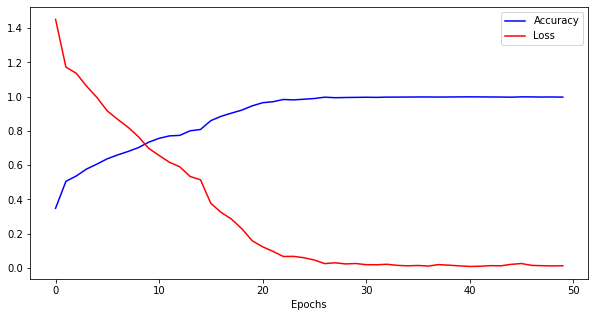

In [115]:
plot_accuracy(training_model)

In [116]:
model=tf.keras.models.load_model("flowermodel.h5")

In [118]:
model.evaluate(x_test,y_test)

55/55 [==============================] - 3s 56ms/step - loss: 2.1130 - accuracy: 0.6618


[2.113025188446045, 0.6618497371673584]

1730.0